# Pymaceuticals Inc.
---

### Analysis

- Capomulin had the lowest average tumor volume compared to the other drugs tested.
- However, Capomulin and Ramicane had similar tumor volume distribution as compared to Infubinol and Ceftamin.
- There was a positive association between mouse weight and tumor volume, the more the mouse weighed, the larger the tumor volume. 
 

In [19]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [20]:
# Checking the number of mice.
unique_mice_before = merged_data_df["Mouse ID"].nunique()
print(unique_mice_before)

249


In [21]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows = merged_data_df[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows['Mouse ID'].unique()

array(['g989'], dtype=object)

In [22]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_rows = merged_data_df[merged_data_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_rows

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

mouse_ids_to_exclude = ['g989']

# Create cleaned_data by excluding rows with specified Mouse IDs
cleaned_data = merged_data_df[merged_data_df['Mouse ID'].isin(mouse_ids_to_exclude) ==False]

In [24]:
# Checking the number of mice in the clean DataFrame.
unique_mice_after = cleaned_data["Mouse ID"].nunique()
print(unique_mice_after)

248


## Summary Statistics

In [25]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats.columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"]
summary_stats

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [26]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_single_line = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([
    ("Mean", "mean"),
    ("Median", "median"),
    ("Variance", "var"),
    ("Standard Deviation", "std"),
    ("SEM", "sem")
])
print(summary_stats_single_line)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

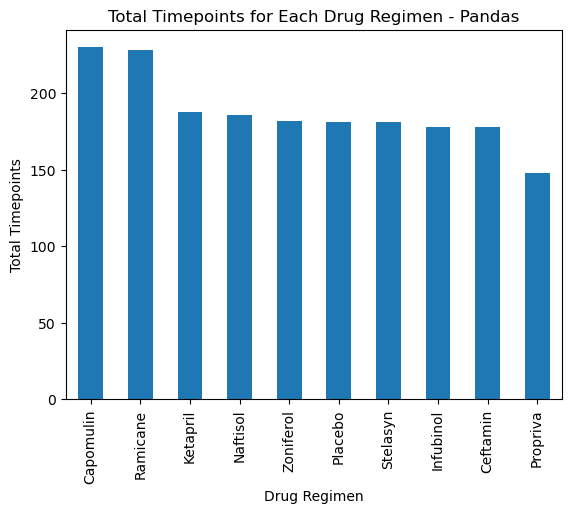

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_chart_pandas = cleaned_data["Drug Regimen"].value_counts().plot(kind="bar", title="Total Timepoints for Each Drug Regimen - Pandas")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.show()

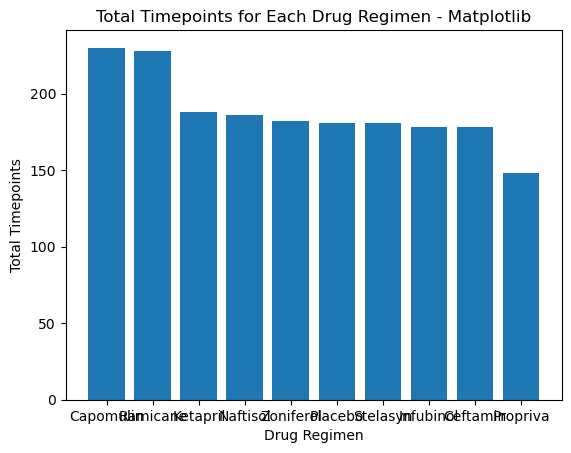

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()
bar_chart_matplotlib = plt.bar(drug_regimen_counts.index, drug_regimen_counts)
plt.title("Total Timepoints for Each Drug Regimen - Matplotlib")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Timepoints")
plt.show()

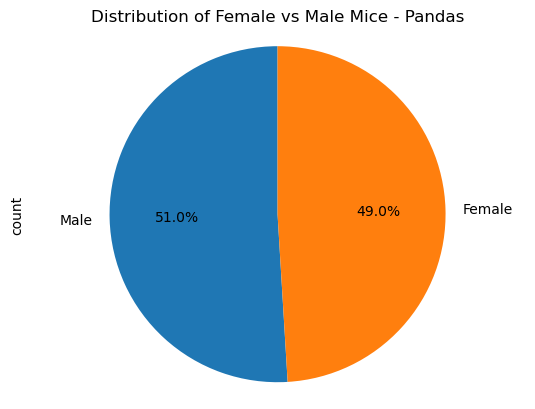

In [29]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart_pandas = cleaned_data["Sex"].value_counts().plot.pie(autopct="%1.1f%%", startangle=90, title="Distribution of Female vs Male Mice - Pandas")
plt.axis("equal")
plt.show()

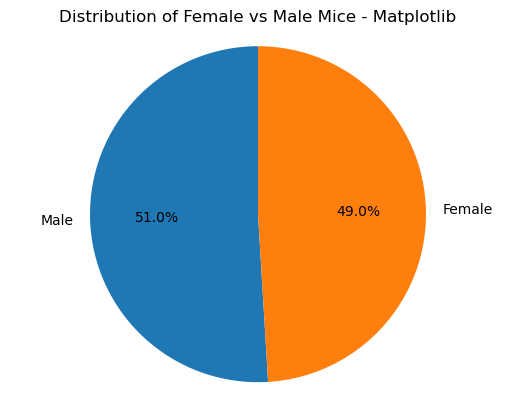

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_chart_matplotlib = plt.pie(cleaned_data["Sex"].value_counts(), labels=cleaned_data["Sex"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution of Female vs Male Mice - Matplotlib")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [31]:
# List of treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Get the last (greatest) timepoint for each mouse
last_timepoint_data = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_data = pd.merge(last_timepoint_data, cleaned_data, on=['Mouse ID', 'Timepoint'], how='left')

# Filter data for the selected treatment regimens
final_tumor_volume_data = final_tumor_volume_data[final_tumor_volume_data['Drug Regimen'].isin(selected_regimens)]

# Display the DataFrame with the final tumor volume for each mouse

print(final_tumor_volume_data[['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']])

    Mouse ID Drug Regimen  Tumor Volume (mm3)
0       a203    Infubinol           67.973419
1       a251    Infubinol           65.525743
3       a275     Ceftamin           62.999356
6       a411     Ramicane           38.407618
7       a444     Ramicane           43.047543
..       ...          ...                 ...
238     y769     Ceftamin           68.594745
239     y793    Capomulin           31.896238
240     y865     Ceftamin           64.729837
244     z578     Ramicane           30.638696
245     z581    Infubinol           62.754451

[100 rows x 3 columns]


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_subset = final_tumor_volume_data.loc[final_tumor_volume_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add subset
    tumor_volume_data.append(tumor_vol_subset)
    
    # Calculate quartiles and IQR
    quartiles = tumor_vol_subset.quantile([0.25, 0.5, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine outliers using upper and lower bounds
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    # Identify potential outliers
    outliers = tumor_vol_subset.loc[(tumor_vol_subset < lower_bound) | (tumor_vol_subset > upper_bound)]
    
    # Display results
    print(f"Potential outliers for {treatment}: {outliers.values}")

# Display the calculated IQR and potential outliers
print("Interquartile Range (IQR) and Potential Outliers:")
print("Treatment\tIQR\t\tLower Bound\tUpper Bound")
for i in range(len(treatments)):
    quartiles = tumor_volume_data[i].quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    lower_bound = lower_q - (1.5 * iqr)
    upper_bound = upper_q + (1.5 * iqr)
    
    print(f"{treatments[i]}\t\t{round(iqr, 2)}\t\t{round(lower_bound, 2)}\t\t{round(upper_bound, 2)}")

Potential outliers for Capomulin: []
Potential outliers for Ramicane: []
Potential outliers for Infubinol: [36.3213458]
Potential outliers for Ceftamin: []
Interquartile Range (IQR) and Potential Outliers:
Treatment	IQR		Lower Bound	Upper Bound
Capomulin		7.78		20.7		51.83
Ramicane		9.1		17.91		54.31
Infubinol		11.48		36.83		82.74
Ceftamin		15.58		25.36		87.67


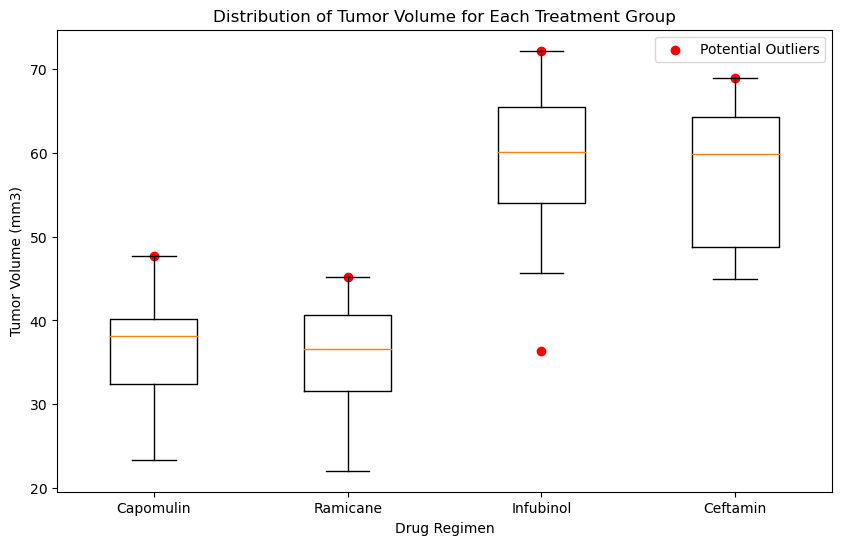

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=treatments, sym='ro')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show potential outliers with red dots
plt.scatter(range(1, len(treatments) + 1), final_tumor_volume_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].max().loc[treatments].values, color='red', marker='o', label='Potential Outliers')

# Add legend
plt.legend()

# Show the plot
plt.show()

## Line and Scatter Plots

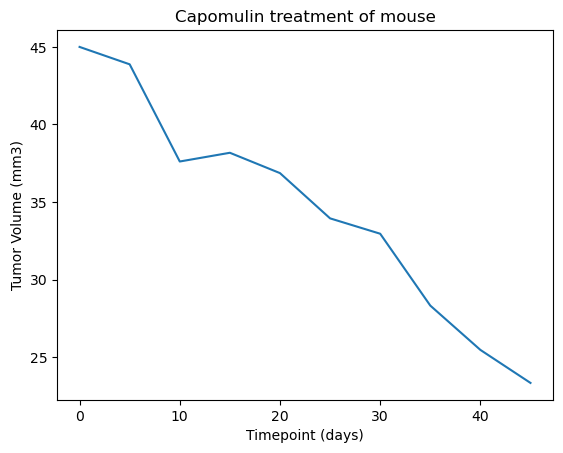

In [34]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Select a single mouse treated with Capomulin
capomulin_mouse = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"].iloc[0]["Mouse ID"]

# Generate a line plot
capomulin_data = cleaned_data.loc[cleaned_data["Mouse ID"] == capomulin_mouse]
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

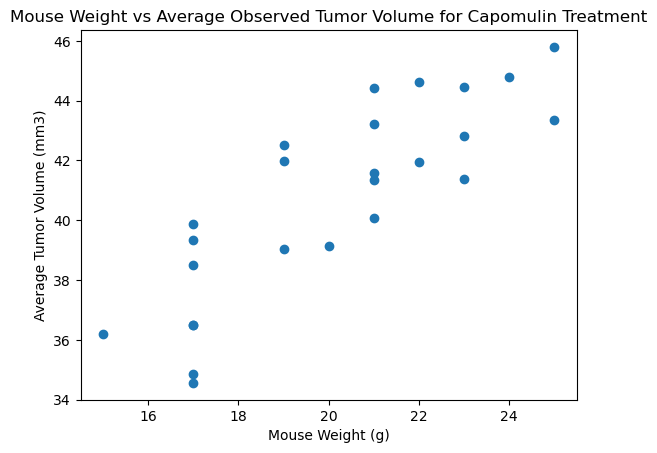

In [35]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_data = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").agg({"Weight (g)": "mean", "Tumor Volume (mm3)": "mean"})
plt.scatter(capomulin_avg_data["Weight (g)"], capomulin_avg_data["Tumor Volume (mm3)"])
plt.title("Mouse Weight vs Average Observed Tumor Volume for Capomulin Treatment")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

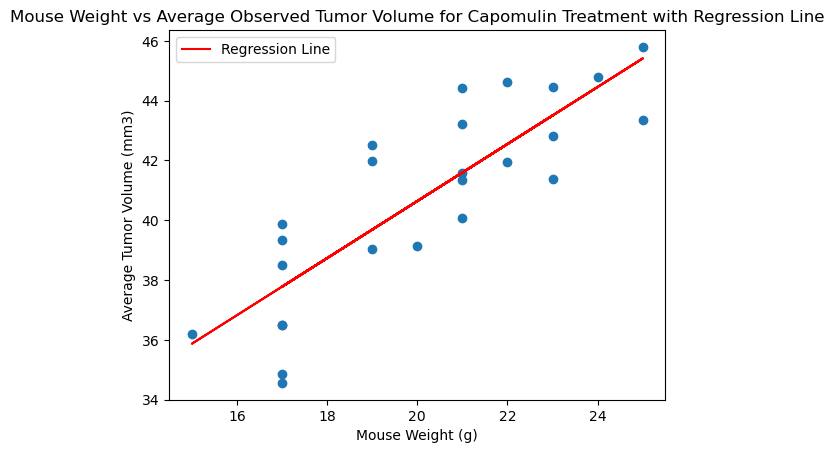

In [36]:
# Calculate the correlation coefficient and a linear regression model 
correlation_coefficient = capomulin_avg_data["Weight (g)"].corr(capomulin_avg_data["Tumor Volume (mm3)"])
slope, intercept, r_value, p_value, std_err = linregress(capomulin_avg_data["Weight (g)"], capomulin_avg_data["Tumor Volume (mm3)"])
regress_values = slope * capomulin_avg_data["Weight (g)"] + intercept


# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(capomulin_avg_data["Weight (g)"], capomulin_avg_data["Tumor Volume (mm3)"])
plt.plot(capomulin_avg_data["Weight (g)"], regress_values, color='red', label='Regression Line')
plt.title("Mouse Weight vs Average Observed Tumor Volume for Capomulin Treatment with Regression Line")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.legend()
plt.show()